<a href="https://colab.research.google.com/github/nikhil-xyz/Data-Cleaning-Notebooks/blob/main/Laptop_Dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Dataset**

This dataset consists of comprehensive collection of latest available laptops scraped from Amazon.com. The data includes product details such as the rating, price, operating system, title, disk size, display size, etc. This dataset comprises approximately 2.8K data points, each representing a unique laptop listing, and includes 17 distinct features.

source(kaggle) : https://www.kaggle.com/datasets/talhabarkaatahmad/laptop-prices-dataset-october-2023

**Data Dictionary**
- **brand** : Make of laptop
- **model** : model of laptop
- **screen size** : The size of the laptop's display in inches.
- **color** : Color of laptop
- **hard disk** : Hard disk installed in GBs or TBs
- **CPU** : Processor installed
- **RAM** : RAM installed in laptop
- **Operating system (OS)** : The operating system of the laptop.
- **Special Features** : Extra features
- **Graphics card** : Graphics card
- **Graphics coprocessor** : Graphics card
- **CPU rating** : CPU rating
- **Rating** : The average customer rating out of 5 as of October 2023.
- **Price** : The price of the product in USD as of October 2023.

Dataset has been downloaded from the kaggle and stored in one of the github repository.

repository_raw_dataset_url = https://raw.githubusercontent.com/nikhil-xyz/datasets/refs/heads/main/laptop_uncleaned.csv'

In [271]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [272]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/refs/heads/main/laptop_uncleaned.csv')

In [273]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99


In [274]:
df.shape

(2843, 17)

In [275]:
# Checking out missing values
df.isna().sum()

,0
Title,0
Brand,33
Screen_Size,87
CPU_Model,215
Ram,132
Operating_System,120
Rating,560
Series,342
Color,734
Resolution,2661


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2843 non-null   object 
 1   Brand             2810 non-null   object 
 2   Screen_Size       2756 non-null   object 
 3   CPU_Model         2628 non-null   object 
 4   Ram               2711 non-null   object 
 5   Operating_System  2723 non-null   object 
 6   Rating            2283 non-null   float64
 7   Series            2501 non-null   object 
 8   Color             2109 non-null   object 
 9   Resolution        182 non-null    object 
 10  Weight            66 non-null     object 
 11  USB               35 non-null     float64
 12  Battery           7 non-null      object 
 13  Graphics          2063 non-null   object 
 14  Disk_size         2248 non-null   object 
 15  Card_desc         2635 non-null   object 
 16  Price             1863 non-null   object 


In [277]:
df.Title.head().values

array(['Microsoft Surface Laptop Intel Core i5 7th Gen 8GB RAM 256GB SSD Win 10 Platinum (Renewed)',
       'Microsoft Surface Laptop 3 13.5" Touch-Screen Intel Core i5-8GB Memory - 256GB Solid State Drive (Latest Model) Matte Black (Renewed)',
       'Microsoft Surface Laptop (Intel Core i7, 16GB RAM, 512GB) - Platinum (Renewed)',
       'Microsoft Surface Laptop 3, 10th Gen Intel Core i5 (13.5-inch Touchscreen - 8GB Memory - 256GB SSD) - Blue (Renewed Premium)',
       '2022 Microsoft Surface Laptop Go 12.4" Touchscreen, Intel Core i5-1035G1 Processor, Up to 13Hr Battery Life, WiFi, Webcam, Windows 11 Pro, Platinum Silver (4GB RAM | 256GB SSD)'],
      dtype=object)

**Observations**
- Multiple features have missing entries and the **Title** feature contains good information about the configuration which will be useful to replace missing values.
- Information retrieval from the **Title** feature and further preprocessing will be easier if the text is in **lower case**.

In [278]:
# transforming all features with object datatype into the lower case.
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

In [279]:
df.Title.head().values

array(['microsoft surface laptop intel core i5 7th gen 8gb ram 256gb ssd win 10 platinum (renewed)',
       'microsoft surface laptop 3 13.5" touch-screen intel core i5-8gb memory - 256gb solid state drive (latest model) matte black (renewed)',
       'microsoft surface laptop (intel core i7, 16gb ram, 512gb) - platinum (renewed)',
       'microsoft surface laptop 3, 10th gen intel core i5 (13.5-inch touchscreen - 8gb memory - 256gb ssd) - blue (renewed premium)',
       '2022 microsoft surface laptop go 12.4" touchscreen, intel core i5-1035g1 processor, up to 13hr battery life, wifi, webcam, windows 11 pro, platinum silver (4gb ram | 256gb ssd)'],
      dtype=object)

In [280]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,microsoft surface laptop intel core i5 7th gen...,microsoft,13.5 inches,1.2ghz cortex a8 processor,8 gb,windows 10,4.4,intel,platinum,NaN,NaN,NaN,NaN,intel hd graphics 620,256 gb,integrated,NaN
1,"microsoft surface laptop 3 13.5"" touch-screen ...",microsoft,13.5 inches,core i5,8 gb,windows 10,4.4,microsoft surface,matte black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"microsoft surface laptop (intel core i7, 16gb ...",microsoft,13.5 inches,core i7,16 gb,windows 10 s,3.9,surface laptop,platinum,NaN,NaN,NaN,NaN,intel iris plus graphics 640,512 gb,integrated,NaN
3,"microsoft surface laptop 3, 10th gen intel cor...",microsoft,13 inches,core i5-1035g7,8 gb,windows 10 home,4.2,surface laptop 3,cobalt blue,NaN,NaN,NaN,NaN,intel iris plus,NaN,integrated,NaN
4,"2022 microsoft surface laptop go 12.4"" touchsc...",microsoft,12.4 inches,core i5,4 gb,windows 11 pro,3.9,surface laptop go,silver,NaN,NaN,NaN,NaN,NaN,256 gb,integrated,$359.99


## Handling the **Brand** feature

The Brand feature represents the make or manufacturer of the laptop. It's a categorical feature with various brands like asus, acer, hp, lenovo, dell, msi, apple, samsung, etc.

In [281]:
df.Brand.isna().sum()

33

In [282]:
# Seperating sample with missing value of Brand into new dataframe
df_brand = df[df.Brand.isna()][['Title', 'Brand']]
df_brand.head().values

array([['acer aspire 1 a115-32-c96u laptop | 15.6" fhd | celeron n4500 | 4gb ddr4 | 128gb emmc | ms 365 personal 1-year subscription | win 11 home in s mode with aopen 24sa2y bi 23.8" fhd va-monitor',
        nan],
       ['acer aspire 1 a115-32-c96u laptop | 15.6" fhd | celeron n4500 | 4gb ddr4 | 128gb emmc | wifi 5 | ms 365 personal 1-year subscription | win 11 home in s mode usb type-c dock d501, 60w pd',
        nan],
       ['panasonic fz-vzsu88u', nan],
       ['panasonic toughbook cf-52 500gb 4gb 15.4" genuine win 7 pro + microsoft office 2010',
        nan],
       ['acer aspire 3 a315-24p-r2sc laptop | 15.6" fhd ips display | amd ryzen 5 7520u | radeon graphics | 8gb lpddr5 | 256gb ssd | wi-fi 5 | windows 11 home usb 3.0 dock u301',
        nan]], dtype=object)

**Observations and Operations**
- Missing values for the Brand can be retrieved from the Title feature
- Once retrieval is done, new dataframe should be merge back with the original one.

In [283]:
def Brand_Retrieval(title):
  """
  The function is responsible for retrieving the brand from the title.
  Args
  title : The title of the laptop.
  Returns
  brand : The brand of the laptop.
  """
  return title.split(' ')[0]

df_brand['Brand'] = df_brand.Title.apply(Brand_Retrieval)

In [284]:
df_brand.values

array([['acer aspire 1 a115-32-c96u laptop | 15.6" fhd | celeron n4500 | 4gb ddr4 | 128gb emmc | ms 365 personal 1-year subscription | win 11 home in s mode with aopen 24sa2y bi 23.8" fhd va-monitor',
        'acer'],
       ['acer aspire 1 a115-32-c96u laptop | 15.6" fhd | celeron n4500 | 4gb ddr4 | 128gb emmc | wifi 5 | ms 365 personal 1-year subscription | win 11 home in s mode usb type-c dock d501, 60w pd',
        'acer'],
       ['panasonic fz-vzsu88u', 'panasonic'],
       ['panasonic toughbook cf-52 500gb 4gb 15.4" genuine win 7 pro + microsoft office 2010',
        'panasonic'],
       ['acer aspire 3 a315-24p-r2sc laptop | 15.6" fhd ips display | amd ryzen 5 7520u | radeon graphics | 8gb lpddr5 | 256gb ssd | wi-fi 5 | windows 11 home usb 3.0 dock u301',
        'acer'],
       ['acer aspire 3 a314-23p-r3qa laptop | 14.0" fhd ips | amd ryzen 5 7520u | amd radeon graphics | 8gb lpddr5 | 512gb ssd | wi-fi 6 | windows 11 home fhd usb 2mp webcam with digital microphone',
        '

In [285]:
df_brand[df_brand.Brand == 'lg'].values

array([['lg lp173wf4(sp)(f1) new replacement lcd screen for laptop led full hd matte',
        'lg']], dtype=object)

**Observations**
- Looks like retrieval is not completely successfull, there is still a possibility for further operations.
- It appears that retrieved laptops Brand name including 'generic', 'chi', 'new', 'boehydis', 'chunghwa', and 'lg' do not belongs to any specific brand but they are in the list as a replacement laptops.
- All such laptops can be assign with the 'generic' brand.  

In [286]:
generic_list = ['generic', 'chi', 'new', 'boehydis', 'chunghwa', 'lg']
df_brand.loc[df_brand.Brand.isin(generic_list), 'Brand'] = 'generic'

In [287]:
df_brand.Brand.unique()

array(['acer', 'panasonic', 'toughbook', 'gigabyte', 'generic', 'msi',
       'dell', 'samsung', 'microsoft'], dtype=object)

In [288]:
# Merging the modified dataframe with Brand name with the original dataframe according to indexes
df.loc[df_brand.index, 'Brand'] = df_brand.Brand

In [289]:
df.Brand.isna().sum()

0

In [290]:
df.Brand.value_counts()

,count
Brand,
hp,390
asus,363
acer,344
dell,334
msi,240
samsung,162
microsoft,158
alienware,150
apple,137


In [291]:
df[df.Brand== 'vgke'][['Title', 'Brand']].values

array([['vgke b12 detachable 2-in-1 laptop touchscreen windows 11, tablet 12.3" with keyboard, intel celeron j4125 2.7ghz, quad core, 8gb ram, 256gb ssd, 3k fhd ips 3000x2000, 2.4g+5g wifi, bluetooth, type c',
        'vgke']], dtype=object)

**Observations**
- There are multiple Brands present which has less than 10 laptops in the list.
- All such Brands can be combined into '**other**'.

In [292]:
# Assigning 'other' Brand name to all brands with laptop count less than 25
df.loc[df.Brand.value_counts()[df.Brand].values < 25, 'Brand'] = 'other'

<Axes: xlabel='Brand'>

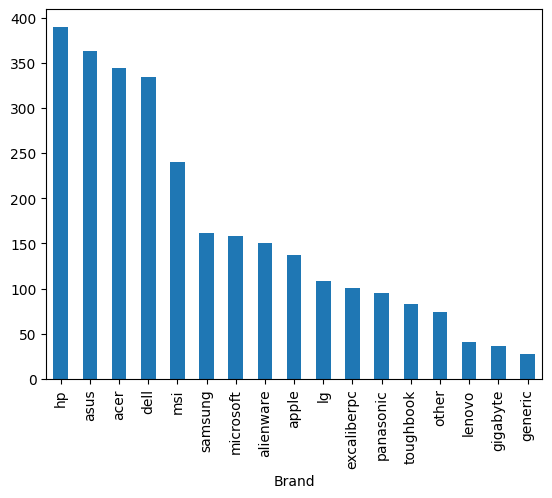

In [293]:
df.Brand.value_counts().plot(kind='bar')

## Handling the **Screen_Size** feature

The Screen_Size feature in your dataset represents the diagonal measurement of the laptop's display in inches. This is a crucial factor for users as it directly impacts their viewing experience. Laptop screen sizes typically range from around 11 inches to 17 inches or larger.

In [294]:
df.Screen_Size.unique()

array(['13.5 inches', '13 inches', '12.4 inches', '14 inches',
       '34 inches', '15.6 inches', '17.3 inches', '17 inches',
       '13.4 inches', '16 inches', '15.6', '15 inches', '15.4 inches',
       nan, '13.3 inches', '16.2 inches', '16', '14.2', '13', '14',
       '10.9 inches', '9.7 inches', '14.1 inches', '12.3 inches',
       '11.6 inches', '13.1 inches', '12 inches', '11 inches',
       '12.5 inches', '13.3', '10.1 inches', '11.6', '17.3',
       '10.4 inches', '31.5 inches', '6 inches', '5.6 inches',
       '10 inches', '17', '12.45 inches', '30 inches', '15',
       '12.2 inches', '24 inches', '14.2 inches', '13.6 inches',
       '18.4 inches', '1 centimeters', '17.25 inches', '0.01',
       '0.1 inches', '14.5', '12.1 inches', '14.5 inches', '10.5 inches',
       '11', '116 inches', '16.6 inches', '3 inches', '14.4 inches',
       '13.5', '14.4', '10.51 inches'], dtype=object)

In [295]:
df.Screen_Size.isna().sum()

87

In [296]:
df[df.Screen_Size.isna()][['Title', 'Screen_Size']].head().values

array([['b belk compatible with macbook air 13 inch case m1, macbook air case 2021 2020 2019 2018 model a2337 a2179 a1932 with touch id, clear plastic laptop hard shell + 2 keyboard covers + screen protector',
        nan],
       ['apple 2022 macbook air laptop with m2 chip: 13.6-inch liquid retina display, 8gb ram, 256gb ssd storage, backlit keyboard, 1080p facetime hd camera. works with iphone and ipad; midnight applecare',
        nan],
       ['apple macbook pro 16" with liquid retina xdr display, m1 pro chip with 10-core cpu and 16-core gpu, 32gb memory, 1tb ssd, silver, late 2021',
        nan],
       ['apple 2022 macbook air laptop with m2 chip: 13.6-inch liquid retina display, 8gb ram, 256gb ssd storage, backlit keyboard, 1080p facetime hd camera. works with iphone and ipad; starlight applecare',
        nan],
       ['apple 2021 macbook pro (14-inch, m1 pro chip with 10‑core cpu and 16‑core gpu, 16gb ram, 1tb ssd) - space gray applecare+ for 14-inch macbook pro',
        nan

**Observations**
- It appears that missing screen size can be retrieved from the **Title** feature.
- Also, rows with no missing values needs removal of unit(inches)

**Operations**
- Samples with missing screen size should be seperated in different dataframe.
- Regular Expressions can be used to achieve the objective retrieving the numeric value.
- (\d+(?:\.\d+)?): This part captures the number, allowing for both decimal and whole number formats.
- \d+: Matches one or more digits.
- (?:\.\d+)?: This is a non-capturing group that matches an optional decimal part.
- (?:...): Creates a non-capturing group.
-  \ .: Matches a literal dot.
- ?: Makes the entire decimal part optional.
- \s*: Matches zero or more whitespace characters.
- [- ]?: Matches an optional hyphen or space.
- inch : Matches the literal text "inch".
- (?:inch|\"): This part matches either "inch" or '"'

In [297]:
# Filtering out samples with or without missing screen size
df_screen_size_missing = df[df.Screen_Size.isna()][['Title', 'Screen_Size']]

In [298]:
def screen_size_retrieval(title):
  """
  The function is responsible for retrieving the screen size from the title.
  Args
  title : The title of the laptop.
  Returns
  screen_size : The screen size of the laptop.
  """

  # Regular Expression for find screen size
  scree_size_pattern = r"(\d{2}(?:\.?\d{1})?)\s*[- ]?\s*(?:inch|\"|\”)"

  screen_size = re.findall(scree_size_pattern, title)
  if screen_size:
    return screen_size[0]
  else:
    return np.nan

df_screen_size_missing['Screen_Size'] = df_screen_size_missing.Title.apply(screen_size_retrieval)

In [299]:
df_screen_size_missing

,Title,Screen_Size
40,b belk compatible with macbook air 13 inch cas...,13
63,apple 2022 macbook air laptop with m2 chip: 13...,13.6
72,"apple macbook pro 16"" with liquid retina xdr d...",16
74,apple 2022 macbook air laptop with m2 chip: 13...,13.6
75,"apple 2021 macbook pro (14-inch, m1 pro chip w...",14
...,...,...
2760,"microsoft surface pro (intel core i5, 8gb ram,...",NaN
2779,"microsoft surface laptop 4, amd ryzen 5 4680u,...",13.5
2820,"samsung 14” galaxy book3 pro laptop computer, ...",14
2821,"samsung 16” galaxy book3 pro laptop computer, ...",16


In [300]:
df_screen_size_missing[df_screen_size_missing.Screen_Size.isna()].values

array([['refurbished panasonic toughbook cf-33, intel core i5-6300u @2.4ghz, ram 8gb, 256gb ssd,4g lte,no key',
        nan],
       ['2nd usb/cf-20/8gb/256gb ssd/windows 10/wifi/4g lte/multi carrier/webcam/emissive backlit keyboard/',
        nan],
       ['toughbook u1 ultra mobile pc', nan],
       ['panasonic fz-vzsu88u', nan],
       ['acer predator triton 500 se gaming/creator laptop | 12th gen intel i9-12900h & nitro 5 an515-57-79td gaming laptop | intel core i7-11800h | nvidia geforce rtx 3050 ti laptop gpu',
        nan],
       ['mk8/cf-19/16gb ram/ 4g lte/ 500gb ssd/ windows 10 pro 64 bit/2.7 ghz/touch screen/',
        nan],
       ['cf30 c2d/1.6 13.3tch 2gb-160gb wls ebk gobi wxp-wv', nan],
       ['panasonic cf-52vaaby1m-rw win7 intel core i5-3360m 2.80ghz 15.4',
        nan],
       ['panasonic toughbook cf-53jjczy1m 14 led notebook intel core i5-3320m 2.60 ghz',
        nan],
       ['cf-20/8gb ram/240gb solid state hard drive/wifi/ 4g lte/ panasonic toughbook/laptop co

**Observations**
- Screen Size can't be further retrieved from the Title.
- Using any imputation technique to assign values to such entries is not reasonable because there shouldn't be any screen size present in the dataset which does not exist in real time.
- So, such entries should be removed rather than keeping them NULL or assigning them a value using any imputation technique.
- The modified dataframe should be merged back with original one before removing rows with missing sceen size.  

In [301]:
df.loc[df_screen_size_missing.index, 'Screen_Size'] = df_screen_size_missing.Screen_Size

In [302]:
# removing samples with missing screen size
df.drop(df[df.Screen_Size.isna()].index, inplace=True)

In [303]:
df.Screen_Size.isna().sum()

0

In [304]:
df.Screen_Size.unique()

array(['13.5 inches', '13 inches', '12.4 inches', '14 inches',
       '34 inches', '15.6 inches', '17.3 inches', '17 inches',
       '13.4 inches', '16 inches', '15.6', '15 inches', '15.4 inches',
       '13', '13.3 inches', '13.6', '16.2 inches', '16', '14', '14.2',
       '10.9 inches', '9.7 inches', '13.3', '14.1 inches', '12.3 inches',
       '11.6 inches', '13.1 inches', '12 inches', '11 inches',
       '12.5 inches', '10.1 inches', '11.6', '17.3', '14.0', '15.4',
       '10.4 inches', '31.5 inches', '6 inches', '5.6 inches',
       '10 inches', '17', '12.45 inches', '30 inches', '15',
       '12.2 inches', '314', '24 inches', '14.2 inches', '13.6 inches',
       '18.4 inches', '1 centimeters', '17.25 inches', '0.01',
       '0.1 inches', '14.5', '12.1 inches', '14.5 inches', '10.5 inches',
       '11', '116 inches', '16.6 inches', '3 inches', '13.5',
       '14.4 inches', '14.4', '12.4', '10.51 inches'], dtype=object)

**Observations and Operations**
- Now, there isn't any missing entry of screen size present in the dataset.
- But there are entries from where the unit (inches) needs to be removed.


In [305]:
df.Screen_Size = df.Screen_Size.apply(lambda x : x.split()[0])

In [306]:
df.Screen_Size.unique()

array(['13.5', '13', '12.4', '14', '34', '15.6', '17.3', '17', '13.4',
       '16', '15', '15.4', '13.3', '13.6', '16.2', '14.2', '10.9', '9.7',
       '14.1', '12.3', '11.6', '13.1', '12', '11', '12.5', '10.1', '14.0',
       '10.4', '31.5', '6', '5.6', '10', '12.45', '30', '12.2', '314',
       '24', '18.4', '1', '17.25', '0.01', '0.1', '14.5', '12.1', '10.5',
       '116', '16.6', '3', '14.4', '10.51'], dtype=object)

In [307]:
df.Screen_Size.isna().sum()

0

In [308]:
df.Screen_Size.info()

<class 'pandas.core.series.Series'>
Index: 2821 entries, 0 to 2842
Series name: Screen_Size
Non-Null Count  Dtype 
--------------  ----- 
2821 non-null   object
dtypes: object(1)
memory usage: 44.1+ KB


In [309]:
# changing datatype of Screen_Size feature from object to float
df.Screen_Size = df.Screen_Size.astype(float)

<Axes: ylabel='Frequency'>

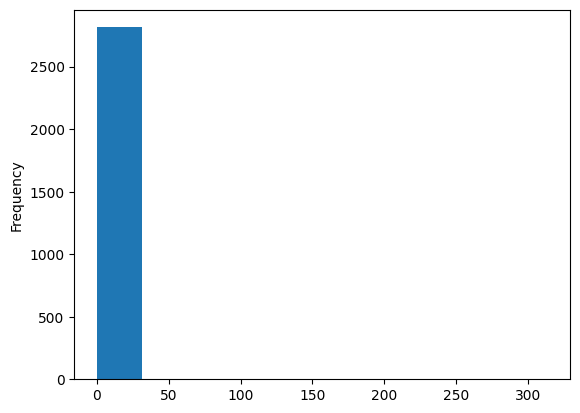

In [310]:
df.Screen_Size.plot(kind='hist')

<Axes: xlabel='Screen_Size'>

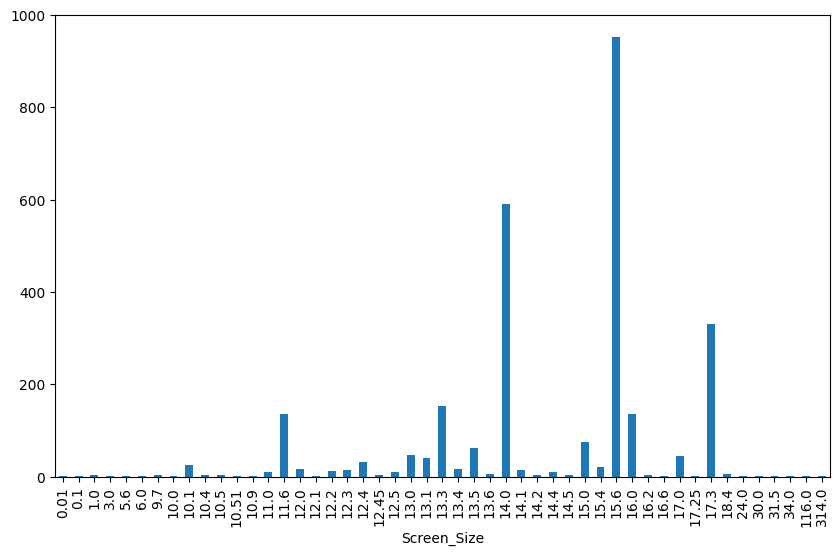

In [311]:
df.Screen_Size.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

**Observations**
- Typical screen size ranges between 11 and 17 inches. But to make it more generalized, the range can be fixed between 10 to 18 inches.
- Every other laptop which do not fall in this range, should be considered as an outlier.

In [312]:
df.Screen_Size[(df.Screen_Size < 10) | (df.Screen_Size > 18)].shape

(28,)

In [313]:
# removing rows with screen size < 10 and screen size > 18
screen_size_outliers_index = df.Screen_Size[(df.Screen_Size < 10) | (df.Screen_Size > 18)].index
df.drop(screen_size_outliers_index, inplace=True)

<Axes: xlabel='Screen_Size'>

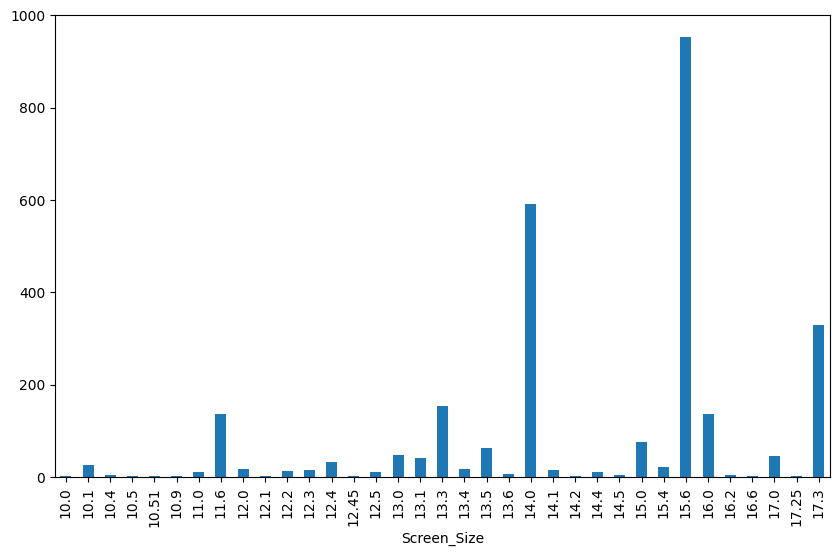

In [314]:
df.Screen_Size.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

In [315]:
df.shape

(2793, 17)

In [316]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System',
       'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

# Handling the **CPU_Model** feature

The CPU_Model feature in your dataset likely refers to the specific processor model used in each laptop. This is a crucial factor determining a laptop's performance.

In [317]:
df.CPU_Model.unique()

array(['1.2ghz cortex a8 processor', 'core i5', 'core i7',
       'core i5-1035g7', 'ryzen 3 2300u', 'intel core i5-1135g7',
       'ryzen 5', 'intel core i9', 'core i7 8750h', 'intel core i7',
       'amd ryzen 9 5900x', 'core i7 6600u', 'ryzen 9', 'core i9',
       'corei5-10300h', 'core i7-3720qm', nan, 'celeron n4020',
       'core i7 family', 'intel core i5', 'ryzen 7', 'arm 7100',
       'apple m1', 'core i5 8250u', 'unknown', 'core i5-6267u', 'core i3',
       'core i7 11800h', 'corei7-10750h', 'amd ryzen 7', 'core i5 family',
       'corei7-9750h', 'ryzen 5 5500u', 'core i7-10510u',
       'core i3 family', 'corei7-1065g7', 'xeon platinum 8160m',
       'core i9 12900h', 'amd ryzen 5 5500u', 'celeron', 'others',
       'celeron n', 'amd a series', 'celeron n4000', 'core i5-5250u',
       'mediatek mt8183', 'ryzen 3 3350u', 'core i7 extreme', 'amd a6',
       'core i5-3340s', '8032', 'pentium', 'core i3 1115g4',
       'intel core i3', 'cortex', 'ryzen 3', 'intel core i7-1165g7'

In [318]:
df.CPU_Model.isna().sum()

193

In [319]:
df[df.CPU_Model.isna()][['Title', 'CPU_Model']].tail(10).values

array([['microsoft surface laptop go 12.4" touchscreen notebook - 1536 x 1024 - intel core i5 10th gen i5-1035g1 1 ghz - 8 gb total ram - 256 gb ssd - platinum - windows 10 pro - intel uhd (renewed)',
        nan],
       ['microsoft surface pro 8-13" touchscreen - intel® evo platform core™ i5-16gb memory - 256gb ssd - graphite (latest model) with microsoft 365 family | 15-month subscription | pc/mac download',
        nan],
       ['microsoft surface pro 6 12.3" pixelsense touchscreen intel core i5-8250u 16gb ram 256gb ssd windows 10 home',
        nan],
       ['microsoft surface book tablet pc - 13.5" - pixelsense - wireless lan - intel core i7 i7-6600u dual-core (2 core) 2.60 ghz - silver sw6-00001',
        nan],
       ['microsoft surface pro 9 (2022), 13" 2-in-1 tablet & laptop, thin & lightweight, intel 12th gen i5 fast processor for multi-tasking, 8gb ram, 256gb storage with windows 11, forest',
        nan],
       ['microsoft surface laptop 4, amd ryzen 5 4680u, 8gb ram, 256

**Observations**
- Like other features, missing information on cpu models can also be retrieved from the **Title** feature using regular expressions.
- From the unique values, it appears that dataset contains cpu models from the family of ryzen, intel core i, amd, celeron, exynos.

In [320]:
# seperating rows with missing cpu model
df_cpu_missing = df[df.CPU_Model.isna()][['Title', 'CPU_Model']]
df_cpu_missing.shape

(193, 2)

(?:ryzen|core[- ]?i|amd|celeron|exynos):

- (?:...): This creates a non-capturing group. It means this part is used for matching but won't be returned as a separate captured group.
 - ryzen|core[- ]?i|amd|celeron|exynos: This is the core of the expression. It uses the pipe symbol | to represent "or". It's looking for any of the following CPU brand/family names:
ryzen
 - core[- ]?i: This matches "core i" with an optional hyphen or space between "core" and "i".
amd
celeron
exynos
-[- ]? : This matches an optional hyphen - or space. It allows for variations in how the brand/family is separated from the model number.
- \d+ : This matches one or more digits (\d). This is intended to capture the model number of the CPU.

In [321]:
def cpu_model_retrieval(title):
  """
  The function is responsible for retrieving the cpu model from the title.
  Args
  title : The title of the laptop.
  Returns
  cpu_model : The cpu model of the laptop.
  """
  # regular expression to find cpu model
  cpu_pattern = r"((?:ryzen|core|amd|celeron|exynos|pentium|intel|m)[- ]?[a-zA-Z]*\d{1}[pro max]*)"
  cpu_model = re.findall(cpu_pattern, title)
  if cpu_model:
    return cpu_model[0]
  else:
    return np.nan

df_cpu_missing['CPU_Model'] = df_cpu_missing.Title.apply(cpu_model_retrieval)

In [322]:
df_cpu_missing.CPU_Model

,CPU_Model
37,m1 ma
40,m1
55,mf0
63,m2
67,m1
...,...
2779,ryzen 5
2783,core i5
2792,NaN
2826,NaN


In [323]:
df_cpu_missing[df_cpu_missing.CPU_Model.isna()].shape

(62, 2)

In [324]:
df_cpu_missing[df_cpu_missing.CPU_Model.isna()].values

array([['apple 2022 10.9-inch ipad (wi-fi, 64gb) - blue (10th generation)',
        nan],
       ['acer spin 7, 14" fhd touch display, qualcomm snapdragon 8cx gen 2 5g compute platform, 8gb lpddr4x, 512gb universal flash storage, 5g, 4g lte, wi-fi, backlit kb, fpr, antimicrobial, sp714-61na-s1qa',
        nan],
       ['panasonic toughbook cf-52 500gb 4gb 15.4" genuine win 7 pro + microsoft office 2010',
        nan],
       ['panasonic cf-30fdsaaam toughbook 30 13.3" c2d l7500 1.6ghz 1gb 80gb xp pro',
        nan],
       ['acer chromebook 514 laptop | 14" fhd touch | mediatek kompanio 828 octa-core processor | 8gb ram | 64gb emmc | wi-fi 6 | backlit kb | chrome os | up to 15 hours battery life | cb514-2ht-k0fz',
        nan],
       ['blackview tablet tab8, 10.1 inch android tablets with 4gb+64gb octa core processor,1920x1200 ips fhd display, 13mp+5mp dual camera, gps, fm, 5g wifi teblet grey',
        nan],
       ['lg bundle gram (2022) 14z90q ultra lightweight-laptop, 14" ips-disp

**Observations**
-

In [325]:
string = 'apple macbook pro 16" with liquid retina xdr display, m1 max chip with 10-core cpu and 32-core gpu, 64gb memory, 4tb ssd, space gray, late 2021'
cpu_pattern = r"((?:ryzen|core[- ]?i|amd|celeron|exynos|pentium|intel|m)[- ]?[a-zA-Z]*\d{1}[pro max]*)"
cpu_model = re.findall(cpu_pattern, string)
cpu_model

['m1 max ']

In [326]:
df_cpu_missing.CPU_Model.value_counts()

,count
CPU_Model,
ryzen 5,15
core i5,13
core i7,11
m2,9
core i5,8
m1 pro,8
m 1,6
core i7,6
m1,5


In [327]:
# merging with original dataframe
df.loc[df_cpu_missing.index, 'CPU_Model'] = df_cpu_missing.CPU_Model

In [328]:
df.CPU_Model.isna().sum()

62

In [329]:
# removing entries with missing cpu model
df.drop(df[df.CPU_Model.isna()].index, inplace=True)

In [330]:
df.CPU_Model.value_counts().head(60)

,count
CPU_Model,
core i7,407
core i5,316
core i7 family,163
intel core i5,114
celeron,109
intel core i7,104
celeron n4020,101
core i5 family,68
unknown,68


In [331]:
df.CPU_Model.value_counts()

,count
CPU_Model,
core i7,407
core i5,316
core i7 family,163
intel core i5,114
celeron,109
...,...
core i7 10870h,1
core i7-10700k,1
core i9-9900k,1


In [332]:
df['CPU_Model'] = df.CPU_Model.apply(cpu_model_retrieval)

In [333]:
# removing white spaces around the cpu model string
df.CPU_Model = df.CPU_Model.apply(lambda x : str(x).strip())

In [334]:
df.CPU_Model.value_counts()

,count
CPU_Model,
core i7,783
core i5,644
nan,407
core i3,139
celeron n4,138
ryzen 5,106
core i9,106
ryzen 7,101
ryzen 3,53


**Observations**
- The above function has generated more than 400 missing values, those rows should be tried on regular expression with the **Title** feature.
- There are lot of inconsistencies present in naming conventions, they should look organized.
- Transforming corei5 and corei7 to core i5 and core i7. Also, replacing 'intel' with 'core'.

In [335]:
df_cpu_missing_again = df[df.CPU_Model == 'nan'][['Title', 'CPU_Model']]
df_cpu_missing_again.shape

(407, 2)

In [336]:
df_cpu_missing_again['CPU_Model'] = df_cpu_missing_again.Title.apply(cpu_model_retrieval)

In [337]:
df_cpu_missing_again.isna().sum()

,0
Title,0
CPU_Model,103


In [338]:
# Merging df and df_cpu_missing dataframe
df.loc[df_cpu_missing_again.index, 'CPU_Model'] = df_cpu_missing_again.CPU_Model

In [339]:
df.CPU_Model.unique()

array(['core i5 ', 'core i5', 'core i7', 'ryzen 3', 'ryzen 5', 'core i9',
       'ryzen 9', 'corei5', 'm1 ma', 'celeron n4', 'm1', 'ryzen 7', 'mf0',
       'm2', 'm1 pro', 'm 7', 'm1 max', 'core i3', 'corei7', 'm 8', 'm1 ',
       'celeron j4', 'celeron 6', 'amd a4', 'm 1', 'm2 ', 'mt8', 'amd a6',
       'm 2', nan, 'celeron n5', 'celeron n3', 'amd 3', 'core 2',
       'core n3', 'celeron 2', 'intel x5 ', 'mb3', 'pentium n6',
       'celeron 3', 'core a1', 'm 5', 'ryzen 3 ', 'intel gma9', 'mk5',
       'mk1', 'm5', 'intel i5', 'ryzen 7 ', 'mk5 ', 'm-5', 'ryzen 5 ',
       'amd 6', 'm tmb1', 'core m3', 'pentium n5', 'm-n1', 'm7', 'core 7',
       'm-n4', 'm2 pro ', 'core i7 ', 'intel 4', 'core n4', 'pentium 4',
       'celeron 1', 'mt4', 'ryzen 3 pro', 'intel n4', 'msm8', 'celeron 4',
       'core 8', 'intel n3', 'core n5', 'core i3 ', 'intel 1',
       'celeron n2', 'intel 2', 'm x5', 'exynos 5', 'm x5 ', 'intel i7',
       'exynos 5 o', 'm 3', 'amd a9', 'intel 3', 'ryzen5', 'intel j4'

In [340]:
df.CPU_Model = df.CPU_Model.apply(lambda x : str(x).replace('core', '').replace('ryzen', 'r').replace('r ', 'r').replace('m ', 'm').replace('m-', 'm').replace('celeron', ''))
df.CPU_Model = df.CPU_Model.apply(lambda x : str(x).replace('t8', '2').replace('intel', '').replace('pentiumn', 'i'))
# removing white spaces around the cpu model string
df.CPU_Model = df.CPU_Model.apply(lambda x : str(x).strip())

In [341]:
df.CPU_Model.value_counts()

,count
CPU_Model,
i7,845
i5,688
n4,208
i3,141
r5,118
i9,118
r7,104
nan,103
m1,63


In [342]:
# replacing models with frequency less than 25 to 'other'
df.CPU_Model[df.CPU_Model.value_counts()[df.CPU_Model].values < 25] = 'other'

<ipython-input-342-6a0e877dd62c>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.CPU_Model[df.CPU_Model.value_counts()[df.CPU_Model].values < 25] = 'other'
<ipython-input-342-6a0e877dd62c>:2: SettingWithCopyWarning: 
A value is trying to

In [343]:
df.CPU_Model.value_counts()

,count
CPU_Model,
i7,845
i5,688
n4,208
other,166
i3,141
r5,118
i9,118
r7,104
nan,103


In [344]:
df.shape

(2731, 17)

In [345]:
df[df.CPU_Model == 'nan'].index

Index([ 449,  458,  465,  467,  479,  491,  543,  551,  585,  614,
       ...
       2677, 2687, 2711, 2756, 2762, 2804, 2811, 2814, 2816, 2825],
      dtype='int64', length=103)

In [346]:
# removing rows with missing cpu model
df.drop(df[df.CPU_Model == 'nan'].index, inplace=True)

In [347]:
df.reset_index(drop=True, inplace=True)

In [348]:
df.shape

(2628, 17)

In [349]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System',
       'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

## Handling the RAM feature

RAM (Random Access Memory) is a crucial component in a laptop. It's the computer's short-term memory, temporarily storing data that the processor needs quick access to.

In [350]:
df.Ram.isna().sum()

69

In [351]:
df.Ram.unique()

array(['8 gb', '16 gb', '4 gb', '64 gb', '32 gb', nan, '24 gb', '128 gb',
       '12 gb', '20 gb', '36 gb', '2 gb', '6 gb', '1 tb', '40 gb',
       '16 mb', '512 gb'], dtype=object)

In [352]:
df.head()[['Title', 'Ram']].values

array([['microsoft surface laptop intel core i5 7th gen 8gb ram 256gb ssd win 10 platinum (renewed)',
        '8 gb'],
       ['microsoft surface laptop 3 13.5" touch-screen intel core i5-8gb memory - 256gb solid state drive (latest model) matte black (renewed)',
        '8 gb'],
       ['microsoft surface laptop (intel core i7, 16gb ram, 512gb) - platinum (renewed)',
        '16 gb'],
       ['microsoft surface laptop 3, 10th gen intel core i5 (13.5-inch touchscreen - 8gb memory - 256gb ssd) - blue (renewed premium)',
        '8 gb'],
       ['2022 microsoft surface laptop go 12.4" touchscreen, intel core i5-1035g1 processor, up to 13hr battery life, wifi, webcam, windows 11 pro, platinum silver (4gb ram | 256gb ssd)',
        '4 gb']], dtype=object)

**Observations**
- Like other features, missing values for Ram can be extracted from the **Title** feature using the regular expressions

In [353]:
df_ram_missing = df[df.Ram.isna()][['Title', 'Ram']]

In [354]:
def ram_retrieval(title):
  """
  The function is responsible for retrieving the ram from the title.
  Args
  title : The title of the laptop.
  Returns
  ram : The ram of the laptop.
  """
  # regular expression to find ram
  ram_pattern = r"(\d+\s*(?:gb|tb))"
  ram = re.findall(ram_pattern, title)
  if ram:
    return ram[0]
  else:
    return np.nan

df_ram_missing.Ram = df_ram_missing.Title.apply(ram_retrieval)

In [355]:
df_ram_missing.Ram.unique()

array([nan, '24gb', '4gb', '8gb', '16gb', '12gb', '256 gb', '32gb',
       '64gb', '20gb', '8 gb'], dtype=object)

In [356]:
df_ram_missing.Ram.isna().sum()

15

In [357]:
df_ram_missing[df_ram_missing.Ram.isna()]['Title'].values

array(['ficihp 13.3" laptop screen extender for m1 macbook one cable plug&play, cooling system triple portable monitor for laptop with usb c hdmi, monitor attachment for laptop frame 13-16 inch mac/android',
       'b belk compatible with macbook air 13 inch case m1, macbook air case 2021 2020 2019 2018 model a2337 a2179 a1932 with touch id, clear plastic laptop hard shell + 2 keyboard covers + screen protector',
       'toughbook cf-53salzalm 14" led notebook - intel core i5 i5-3340m 2.70 ghz (renewed)',
       'toughbook cf-52nkb102m 15.4" notebook - intel core i5 i5-540m 2.53 ghz',
       'cf-52,intelcore i3-330m 2.13ghz,15.4inch',
       'panasonic toughbook cf-31agaea1m 13.1" led notebook - core i5 i5-520m 2.40 ghz (cf-31agaea1m)',
       'toughbook cf-31wxn291m 13.1" touchscreen led (circulumin) notebook - intel core i5 i5-3340m 2.70 ghz',
       'toughbook cf-31jegax1m 13.1" notebook - core i5 i5-2520m 2.50 ghz - magnesium alloy',
       'panasonic toughbook cf-31acaaa1m 13.1" l

**Observations**
- Looks like Ram cannot be further extracted from the **Title** feature

In [358]:
# merging back current dataframe with the original one
df.loc[df_ram_missing.index, 'Ram'] = df_ram_missing.Ram

In [359]:
df.Ram.isna().sum()

15

In [360]:
# removing rows with missing Ram values
df.drop(df[df.Ram.isna()].index, inplace=True)

In [361]:
df.Ram.unique()

array(['8 gb', '16 gb', '4 gb', '64 gb', '32 gb', '24 gb', '24gb',
       '128 gb', '12 gb', '20 gb', '36 gb', '4gb', '2 gb', '8gb', '6 gb',
       '1 tb', '16gb', '12gb', '256 gb', '40 gb', '32gb', '64gb', '16 mb',
       '512 gb', '20gb'], dtype=object)

In [362]:
def unit_conversion(memory):
  """
  This function is responsible for the unit conversion of memory
  Args
  memory : The memory of the laptop.
  Returns
  memory : The converted memory of the laptop (in gb).
  """

  # seperating the unit(gb) from the numeric value
  number = re.findall(r"(\d+)", memory)[0].strip()
  unit = ''
  try:
    unit = re.findall(r"([a-z])", memory)[0].strip()
  except:
    unit = 'g'
  memory = int(float(number))

  if unit == 't':
    memory = memory * 1024
  else:
    memory = memory

  return memory

df.Ram = df.Ram.apply(unit_conversion)

In [363]:
df.Ram = df.Ram.astype(int)
df.Ram.unique()

array([   8,   16,    4,   64,   32,   24,  128,   12,   20,   36,    2,
          6, 1024,  256,   40,  512])

In [364]:
unit_conversion('1 tb')

1024

In [365]:
re.findall(r"\d+", '1 tb')

['1']

Text(0.5, 0, 'Ram in gb')

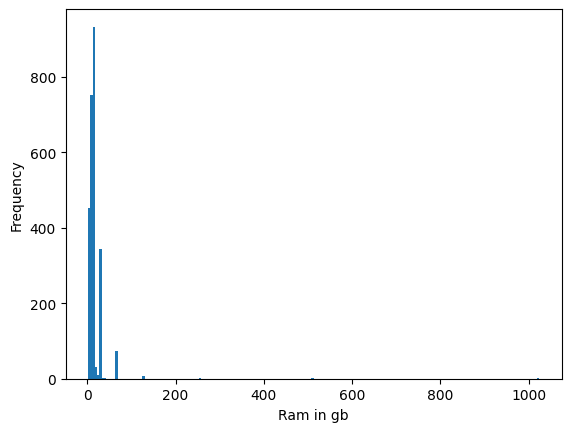

In [366]:
df.Ram.plot(kind='hist', bins=200)
plt.xlabel('Ram in gb')

In [367]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System',
       'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

## Handling the **Disk_size** feature

A hard disk is a storage device in a laptop that stores the operating system, applications, and user data. It uses magnetic storage on rotating platters to save and retrieve digital information. This dataset's hard disk feature specifies its storage capacity, typically measured in gigabytes (GB) or terabytes (TB).

In [368]:
df.Disk_size.unique()

array(['256 gb', nan, '512 gb', '128 gb', '2 tb', '1 tb', '3 tb', '4 tb',
       '320 gb', '512 tb', '32 gb', '1000 gb', '1000 tb', '64 gb', '64',
       '4 gb', '500 gb', '240 gb', '16 gb', '250 gb', '1 gb', '628 gb',
       '160 gb', '6 gb', '960 gb', '480 gb', '256', '512', '6 tb',
       '1.5 tb', '180 gb', '120 gb', '1512 gb', '1256 gb', '1024 gb',
       '1128 gb', '2000 gb', '0.01 gb', '80 gb', '384 gb', '300 gb', '1',
       '1280 gb', '65 gb', '2', '128 tb', '511.98 gb'], dtype=object)

In [369]:
df.Disk_size.isna().sum()

465

In [370]:
# filtering rows with missing disk size
df_disk_missing = df[df.Disk_size.isna()][['Title', 'Disk_size']]

In [371]:
def disk_retrieval(title):
  """
  The function is responsible for retrieving the ram from the title.
  Args
  title : The title of the laptop.
  Returns
  disk : The disk size of the laptop.
  """
  # regular expression to find ram
  disk_pattern = r"(\d+)\s*(?:gb|tb)"
  disk = re.findall(disk_pattern, title)
  if len(disk) > 1:
    return disk[1]
  else:
    return np.nan

df_disk_missing.Disk_size = df_disk_missing.Title.apply(disk_retrieval)

In [372]:
df_disk_missing.Disk_size.isna().sum()

17

In [373]:
df_disk_missing[df_disk_missing.Disk_size.isna()].values

array([['panasonic toughbook cf-54g2878vm 256gb ssd, 8rg ram, emissive backlit keyboard, windows 10 pro',
        nan],
       ['panasonic toughbook laptop cf-31 sblax!m new!', nan],
       ['acer travelmate b3 tmb311-31-c343 - celeron n4020 / 1.1 ghz -',
        nan],
       ['hp victus 15.6" gaming laptop pc, nvidia geforce rtx 3050 ti, amd ryzen 7 5800h, refined 1080p ips display, compact design, all-in-one keyboard with enlarged touchpad, hd webcam (15-fb0028nr, 2022)',
        nan],
       ['lg 15zt90p-g.am33u1 15" gram lightweight notebook', nan],
       ['lg gram laptop - 15.6" full hd ips, intel 10th gen core i5 (10210u cpu), with microsoft 365 family 12-month subscription',
        nan],
       ['lg 17zt90p-g.ax33u1 17" gram lightweight notebook', nan],
       ['microsoft surface pro 3 (256 gb, intel core i5)(windows 10 professional 64 bit) (renewed)',
        nan],
       ['15.6 inch laptop,windows 10 pro, 1366×768 hd screen,intel celeron n5100 processor,6gb ram，128g ssd',
  

In [374]:
# merging the current dataframe with the original
df.loc[df_disk_missing.index, 'Disk_size'] = df_disk_missing.Disk_size

In [375]:
df.Disk_size.isna().sum()

17

In [376]:
# removing rows with missing disk size values
df.drop(df[df.Disk_size.isna()].index, inplace=True)

In [377]:
df.Disk_size.isna().sum()

0

In [378]:
df.Disk_size.unique()

array(['256 gb', '256', '512 gb', '128 gb', '2 tb', '1 tb', '1', '3 tb',
       '4 tb', '320 gb', '2', '512', '512 tb', '32 gb', '1000 gb',
       '1000 tb', '4', '64 gb', '64', '4 gb', '500 gb', '240 gb', '128',
       '16 gb', '250 gb', '1 gb', '32', '628 gb', '160 gb', '16', '6 gb',
       '160', '8', '960 gb', '480 gb', '6 tb', '1.5 tb', '180 gb', '12',
       '120 gb', '1512 gb', '1256 gb', '1024 gb', '1128 gb', '2000 gb',
       '0.01 gb', '80 gb', '384 gb', '960', '300 gb', '1280 gb', '65 gb',
       '128 tb', '320', '511.98 gb'], dtype=object)

In [379]:
# unit conversion of disk
df.Disk_size = df.Disk_size.apply(unit_conversion)

In [380]:
df.Disk_size.unique()

array([    256,     512,     128,    2048,    1024,       1,    3072,
          4096,     320,       2,  524288,      32,    1000, 1024000,
             4,      64,     500,     240,      16,     250,     628,
           160,       6,       8,     960,     480,    6144,     180,
            12,     120,    1512,    1256,    1128,    2000,       0,
            80,     384,     300,    1280,      65,  131072,     511])

In [381]:
df.Disk_size.isna().sum()

0

In [382]:
df.reset_index(drop=True, inplace=True)

In [383]:
df[df.Ram >= df.Disk_size][['Title', 'Ram', 'Disk_size']].values

array([['excaliberpc 2022 msi creator z17 a12ugst-049 (i7-12700h, 32gb ram, 1tb nvme ssd, rtx 3070ti 8gb, 17" qhd+ 165hz touch, windows 11 pro) content creation laptop',
        32, 1],
       ['excaliberpc 2022 msi raider ge67hx 12ugs-013 (i7-12800hx, 16gb ram, 1tb nvme ssd, rtx 3070ti 8gb, 15.6" qhd 240hz, windows 11 pro) gaming laptop',
        16, 1],
       ['excaliberpc 2022 msi summit e13flipevo a12mt-013 (i7-1260p, 32gb ram, 1tb nvme ssd, intel iris xe, 13.4" fhd+ touch, windows 11 pro) professional laptop',
        32, 1],
       ['excaliberpc 2022 msi creator z16p b12uht-041 (i7-12700h, 32gb ram, 1tb nvme ssd, rtx 3080 8gb, 16" qhd+ 165hz touch, windows 11 pro) content creation laptop',
        32, 1],
       ['excaliberpc 2021 msi we76 11uk-460 (i7-11800h, 32gb ram, 1tb nvme ssd, quadro rtx a3000 6gb, 17.3" 144hz fhd, windows 10 pro) mobile workstation laptop',
        32, 1],
       ['excaliberpc 2022 asus rog zephyrus duo 16 gx650rx-xs97 (amd ryzen 9 6900hx, 32gb ram, 2tb 

**Observations**
- Thre are more than 200 samples present inside the dataset where ram size is greater than the disk size

In [384]:
# rows with ram size greater than disk size
df_ram_disk = df[df.Ram >= df.Disk_size][['Title', 'Ram', 'Disk_size']]

In [385]:
df_ram_disk.shape

(202, 3)

In [386]:
def ram_disk_retrieval(title):
  """
  The function is responsible for retrieving the ram from the title.
  Args
  title : The title of the laptop.
  Returns
  disk : The ram and disk size of the laptop.
  """

  list = re.findall(r"(\d+)\s*(?:gb|tb)", title)
  memories = [unit_conversion(temp) for temp in list]
  return min(memories), max(memories)

df_ram_disk['Ram'], df_ram_disk['Disk_size'] = zip(*df_ram_disk.Title.apply(ram_disk_retrieval))

In [387]:
df_ram_disk[df_ram_disk.Ram >= df_ram_disk.Disk_size][['Title', 'Ram', 'Disk_size']].values

array([['acer 11.6" touchscreen convertible spin 311 chromebook laptop, 32gb storage, silver (cp311-3h-k23x)',
        32, 32]], dtype=object)

In [388]:
# merging back with the original dataframe
df.loc[df_ram_disk.index, ['Ram', 'Disk_size']] = df_ram_disk[['Ram', 'Disk_size']]

In [389]:
df[df.Ram >= df.Disk_size][['Title', 'Ram', 'Disk_size']].shape

(1, 3)

In [390]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System',
       'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

## Handling the **Graphics** feature

Computer graphics involves creating and manipulating images using computers. It's a broad field encompassing everything from creating realistic 3D models for movies and video games to generating simple charts and graphs for presentations.

In [391]:
df.Graphics.unique()

array(['intel hd graphics 620', nan, 'intel iris plus graphics 640',
       'intel iris plus', 'amd radeon vega 3', 'intel uhd graphics',
       'nvidia geforce gtx 1070', 'nvidia geforce rtx 3070',
       'nvidia geforce rtx 3070 ti', 'intel iris xe graphics',
       'nvidia geforce rtx 3080', 'nvidia geforce rtx 3060',
       'intel hd graphics 4000', 'nvidia geforce gtx 1650',
       'nvidia quadro rtx a3000', 'intel', 'nvidia geforce rtx 3080 ti',
       'nvidia quadro rtx a2000', 'nvidia geforce gtx 1650 max-q',
       'intel uhd graphics 630', 'nvidia geforce rtx 3050',
       'nvidia quadro a2000', 'amd radeon rx6700m',
       'intel hd graphics 5000', 'nvidia geforce rtx 2070',
       '\u200eintel iris xe', 'nvidia geforce gtx 1650 ti max-q',
       'nvidia geforce rtx 3070 max-q', 'amd radeon pro 560', 'm1 pro',
       'intel iris plus graphics 655', 'nvidia geforce gt 650m',
       'intel hd graphics 630', 'amd radeon pro / intel hd graphics 530',
       'intel hd graphics 60

In [392]:
df.Graphics.isna().sum()

652

**Observations**
- All of the unique entries can be consolidated in three groups
 - nvidia
 - amd
 - intel
- For missing values, same old approach should be followed and values should be retrieved from the **Title** feature.

In [393]:
def graphics_retrieval(title):
  """
  The function is responsible for retrieving the graphics from the title.
  Args
  title : The title of the laptop.
  Returns
  graphics : The graphics of the laptop.
  """
  list = str(title).split()
  if 'intel' in list:
    return 'intel'
  elif ('amd' in list) or ('radeon' in list):
    return 'amd'
  elif ('nvidia' in list) or ('nvida' in list):
    return 'nvidia'
  else:
    return np.nan

df.Graphics = df.Graphics.apply(graphics_retrieval)

In [394]:
df.Graphics.value_counts()

,count
Graphics,
intel,1001
nvidia,631
amd,187


In [395]:
df.Graphics.isna().sum()

777

In [396]:
# seperating rows with missing entries
df_graphics_missing = df[df.Graphics.isna()][['Title', 'Graphics']]
df_graphics_missing.Graphics = df_graphics_missing.Title.apply(graphics_retrieval)

In [397]:
df_graphics_missing.Graphics.value_counts()

,count
Graphics,
intel,531
amd,88
nvidia,2


In [398]:
df.loc[df_graphics_missing.index, 'Graphics'] = df_graphics_missing.Graphics

In [399]:
df.Graphics.isna().sum()

156

In [400]:
df.Graphics.value_counts()

,count
Graphics,
intel,1532
nvidia,633
amd,275


In [401]:
# rows that are still empty can be assigned with the 'other' category
df.Graphics.fillna('other', inplace=True)

<ipython-input-401-940ef632343c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Graphics.fillna('other', inplace=True)


In [402]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System',
       'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

## Handling the **Rating** feature

In [403]:
df.Rating.unique()

array([4.4, 3.9, 4.2, 4.3, 4.5, 5. , 4.1, nan, 3.1, 4.8, 4.7, 3.8, 3. ,
       3.4, 4. , 2.5, 4.9, 2.8, 3.3, 3.6, 2.4, 3.5, 4.6, 3.7, 2. , 1. ,
       2.1, 2.6, 3.2, 2.7, 2.9, 2.2, 2.3])

In [404]:
df.Rating.isna().sum()

504

In [405]:
df.groupby('Brand')['Rating'].mean()

,Rating
Brand,
acer,4.351613
alienware,4.108989
apple,4.246000
asus,4.290291
dell,4.188390
excaliberpc,4.470270
generic,5.000000
gigabyte,3.620833
hp,4.368652


**Operations**
- Missing ratings can be assigned based on the mean rating of respected brand

In [407]:
# calculating the mean ratings for each brand
mean_ratings = df.groupby('Brand')['Rating'].mean()
df_Rating = df[df.Rating.isna()][['Brand', 'Rating']]

In [408]:
df_Rating.Rating = df_Rating.Brand.apply(lambda x : mean_ratings[x])

In [409]:
df_Rating.isna().sum()

,0
Brand,0
Rating,0


In [410]:
# merging the current and the new dataframe
df.loc[df_Rating.index, 'Rating'] = df_Rating.Rating

In [411]:
df.Rating.isna().sum()

0

In [412]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System',
       'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

In [413]:
df.drop(['Title', 'Operating_System', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery', 'Card_desc'], axis=1, inplace=True)

## Handling the **Price** feature

In [421]:
df.drop_duplicates(inplace=True)
df.drop(df[df.Price.isna()].index, inplace=True)

In [426]:
df.Price.unique()

array(['$359.99', '$818.00', '$699.00', '$2,449.99', '$1,799.95',
       '$1,699.00', '$3,049.00', '$1,899.00', '$1,549.00', '$4,345.00',
       '$1,799.00', '$3,295.00', '$1,399.00', '$1,949.99', '$689.99',
       '$2,499.00', '$2,649.00', '$3,199.00', '$4,595.00', '$5,195.00',
       '$2,319.00', '$799.00', '$229.99', '$978.75', '$1,658.52',
       '$1,099.00', '$2,399.00', '$2,799.00', '$3,599.00', '$1,449.00',
       '$1,199.00', '$1,499.00', '$1,619.00', '$2,899.00', '$1,299.00',
       '$854.21', '$1,579.00', '$1,468.95', '$1,242.96', '$950.61',
       '$1,649.00', '$2,084.45', '$2,699.00', '$239.00', '$2,999.00',
       '$870.00', '$1,536.99', '$1,045.52', '$714.49', '$2,409.00',
       '$1,496.24', '$1,749.99', '$1,999.00', '$699.99', '$1,072.30',
       '$619.00', '$1,499.98', '$1,574.99', '$1,197.00', '$999.00',
       '$1,679.00', '$1,624.92', '$1,249.99', '$891.82', '$1,283.95',
       '$4,499.00', '$682.47', '$2,349.00', '$4,699.99', '$2,099.00',
       '$1,090.26', '$728.

**Observations and Operations**
- At first, the dollar('$') sign should be removed from all the prices.
- Later, prices can be converted into the local currency (Rupee)

In [428]:
def price_preprocessing(price):
  """
  The function is responsible for preprocessing the price.
  Args
  price : The price of the laptop.
  Returns
  price : The Price of laptop in rupee
  """
  price = price.replace('$', '').replace(',', '')
  price = float(price)
  return price*80

df.Price = df.Price.apply(price_preprocessing)

In [431]:
df.Price.head()

,Price
4,28799.2
6,65440.0
7,55920.0
8,195999.2
9,143996.0


In [422]:
df.shape

(1401, 8)

## **Exploratory Data Analysis (EDA)**

In [414]:
df.columns

Index(['Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating', 'Graphics',
       'Disk_size', 'Price'],
      dtype='object')

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 4 to 2595
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1401 non-null   object 
 1   Screen_Size  1401 non-null   float64
 2   CPU_Model    1401 non-null   object 
 3   Ram          1401 non-null   int64  
 4   Rating       1401 non-null   float64
 5   Graphics     1401 non-null   object 
 6   Disk_size    1401 non-null   int64  
 7   Price        1401 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 98.5+ KB


In [432]:
numeric_features = df.select_dtypes(include='number').columns
numeric_features

Index(['Screen_Size', 'Ram', 'Rating', 'Disk_size', 'Price'], dtype='object')

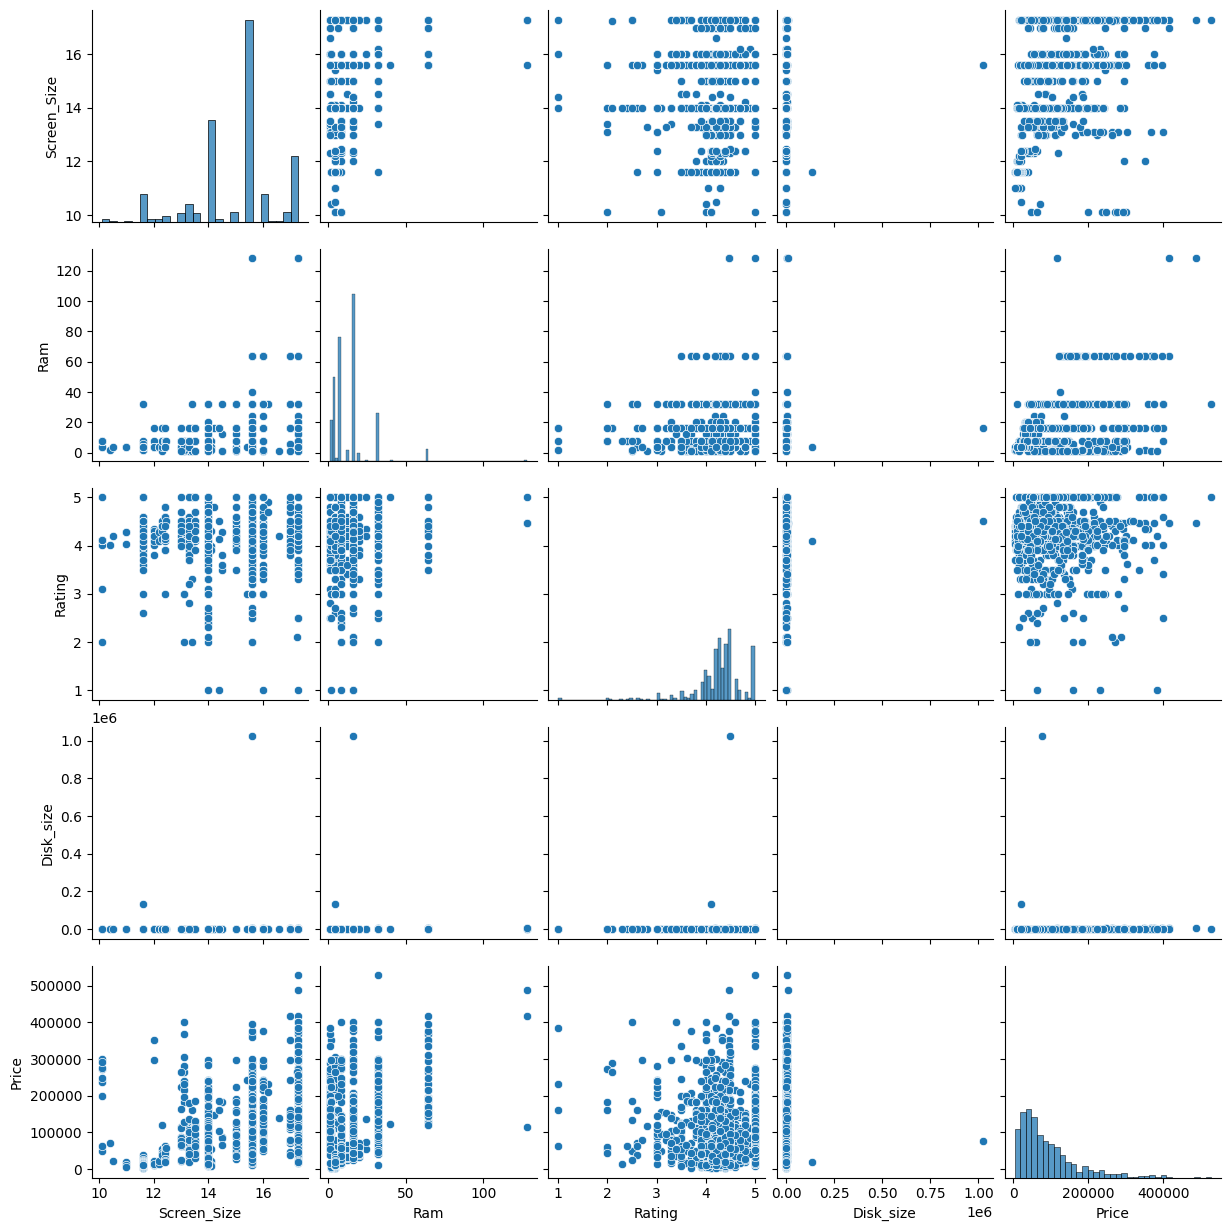

In [433]:
sns.pairplot(df[numeric_features])

<Axes: >

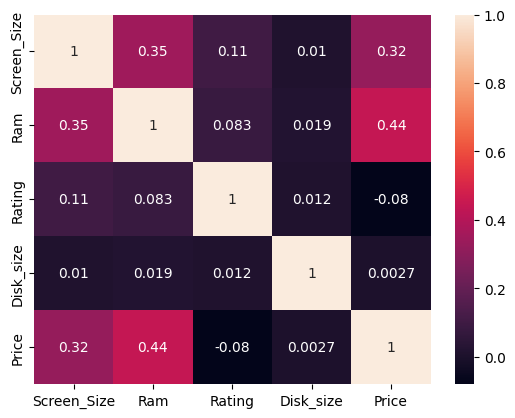

In [434]:
sns.heatmap(df[numeric_features].corr(), annot=True)

In [435]:
df.columns

Index(['Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating', 'Graphics',
       'Disk_size', 'Price'],
      dtype='object')

<Axes: ylabel='Frequency'>

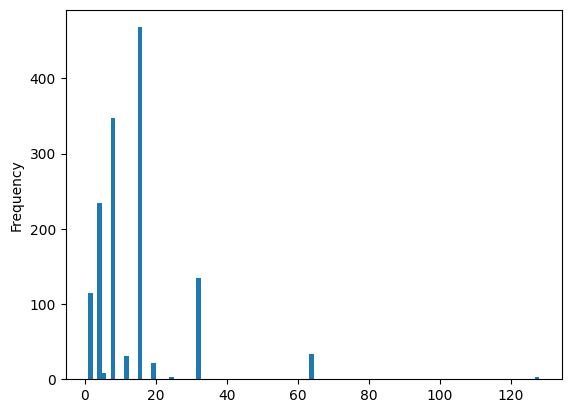

In [439]:
df.Ram.plot(kind='hist', bins=100)

In [448]:
df[df.Ram > 64]['Ram']

,Ram
189,128
198,128
907,128


In [453]:
df.drop(df[df.Ram > 64].index, inplace=True)

<Axes: ylabel='Frequency'>

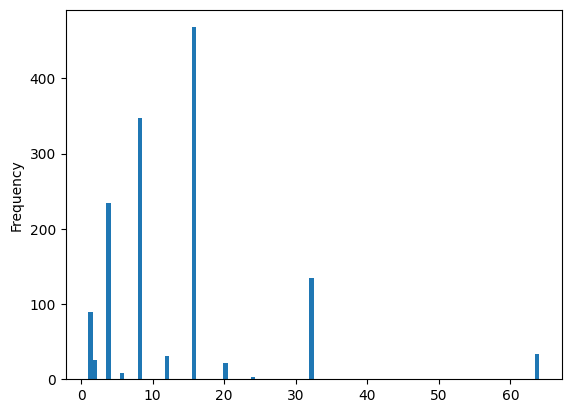

In [454]:
df.Ram.plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

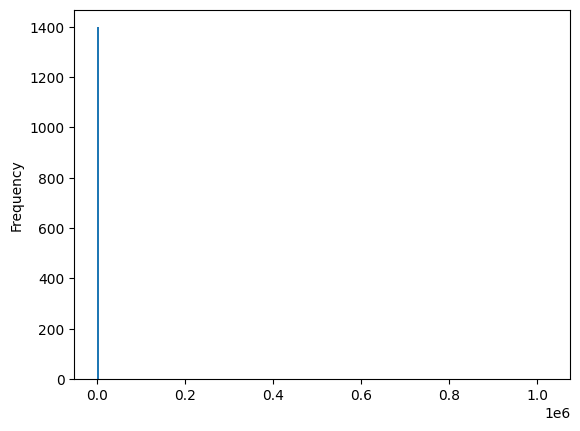

In [450]:
df.Disk_size.plot(kind='hist', bins=200)

In [451]:
df.Disk_size.unique()

array([    256,     512,    2048,    1024,      32,      16,    3072,
          4096,     320,     128,    1000, 1024000,      64,     500,
            24,     628,     160,       8,    6144,    1512,    1256,
          1128,    2000,      80,      40,     384,      12,      65,
        131072])

In [452]:
df[df.Disk_size > 4096]['Disk_size']

,Disk_size
246,1024000
907,6144
2153,131072


In [455]:
df.drop(df[df.Disk_size > 4096].index, inplace=True)

<Axes: ylabel='Frequency'>

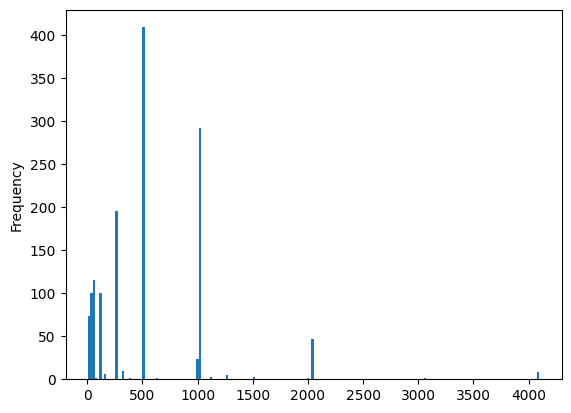

In [456]:
df.Disk_size.plot(kind='hist', bins=200)

<Axes: ylabel='Frequency'>

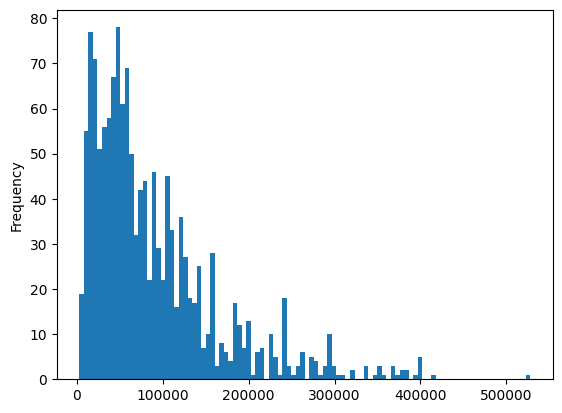

In [457]:
df.Price.plot(kind='hist', bins=100)

In [465]:
df[(df.Price < 10000) | (df.Price > 250000)].shape

(93, 8)

In [466]:
df.drop(df[(df.Price < 10000) | (df.Price > 250000)].index, inplace=True)

<Axes: ylabel='Frequency'>

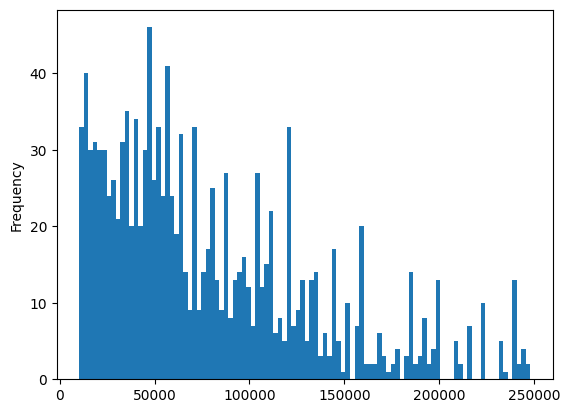

In [467]:
df.Price.plot(kind='hist', bins=100)